In [1]:
from PythonTsa.datadir import getdtapath
import pandas as pd
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
dtapath=getdtapath()
nao =pd.read_csv(dtapath + 'nao.csv', header = 0)

# 5.1

In [8]:
x =pd.read_csv(dtapath + 'USFemalesAged20+Job1948-81.csv', header = None)
x

,0
0,446
1,650
2,592
3,561
4,491
...,...
403,2975
404,3064
405,3092
406,3063


In [12]:
dates = pd.date_range(start='1948-01', periods = len(x), freq='M')
x.index =dates
x=pd.Series(x[0])

In [15]:
from statsmodels.graphics.tsaplots import month_plot

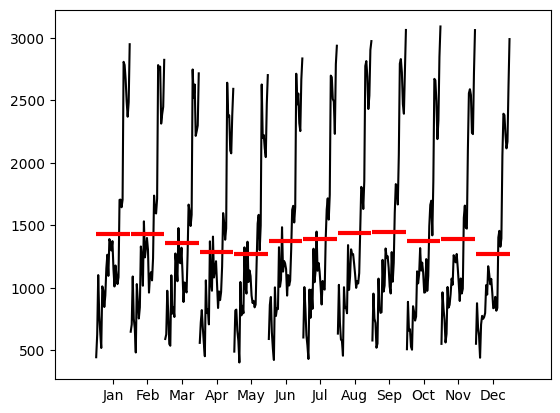

In [17]:
month_plot(x)
plt.show()

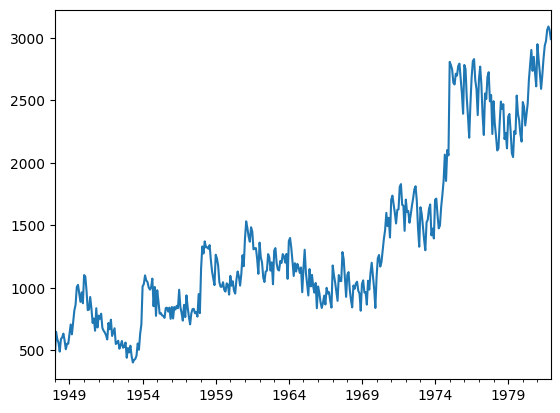

In [18]:
x.plot()
plt.show()

In [21]:
dDx = sm.tsa.statespace.tools.diff(x, k_diff=1, k_seasonal_diff = 1, seasonal_periods = 12)

<Axes: >

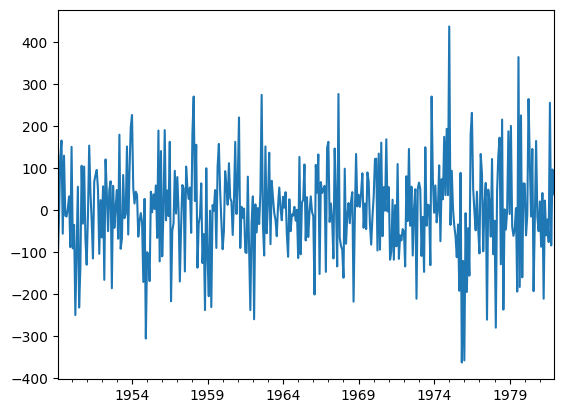

In [22]:
dDx.plot()

In [26]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig

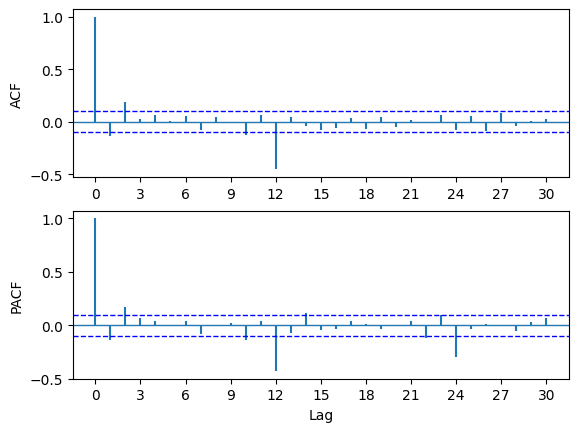

In [28]:
acf_pacf_fig(dDx, both = True)

In [207]:
sarima = sm.tsa.SARIMAX(x, order = (2,1,0), seasonal_order=(0,1,1,12)).fit()
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  408
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -2326.632
Date:                              Fri, 02 Aug 2024   AIC                           4661.264
Time:                                      18:54:23   BIC                           4677.179
Sample:                                  01-31-1948   HQIC                          4667.570
                                       - 12-31-1981                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1119      0.047     -2.390      0.017      -0.204      -0.020
ar.L2          0.1315      0.042      3.156      0.002       0.050       0.213
ma.S.L12      -0.7837      0.034    -22.747      0.000      -0.851      -0.716
sigma2      7435.0004    427.969     17.373      0.000    6596.197    8273.804
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                87.05
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             0.69
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

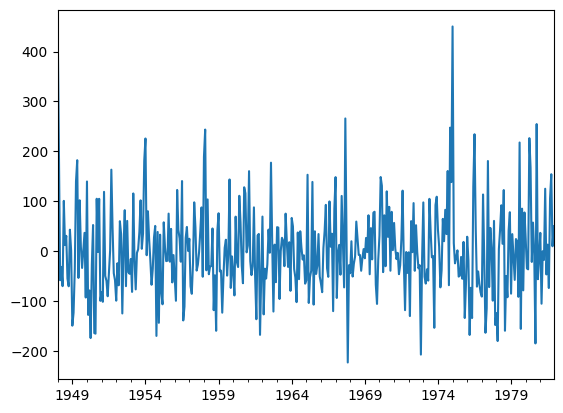

In [208]:
sarima.resid.plot()

In [194]:
from PythonTsa.LjungBoxtest import plot_LB_pvalue

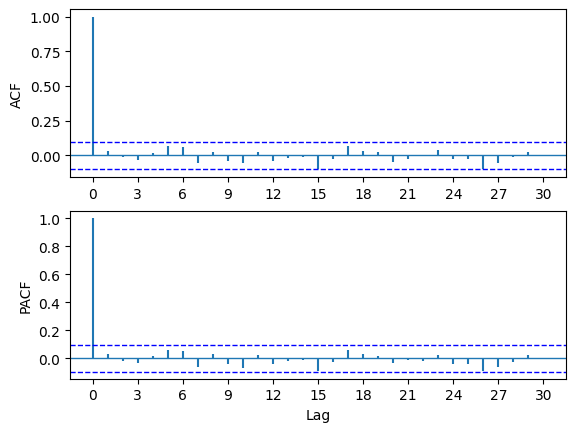

In [209]:
acf_pacf_fig(sarima.resid, both = True)

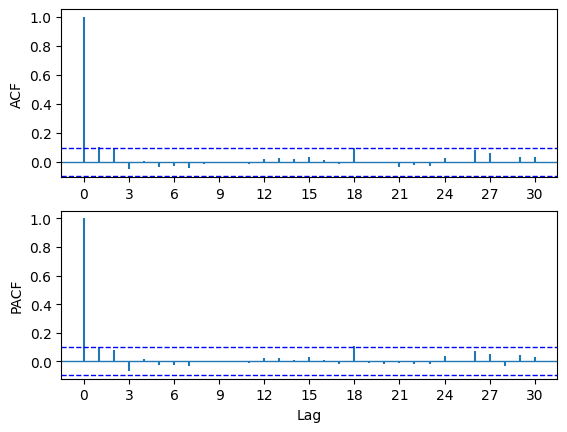

In [215]:
acf_pacf_fig(sarima.resid**2, both = True)

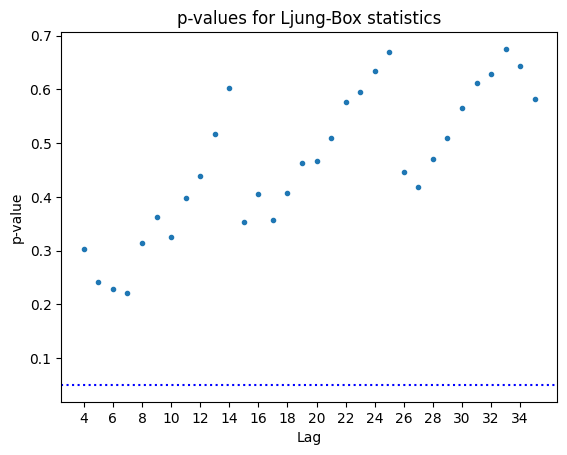

In [211]:
plot_LB_pvalue(sarima.resid, noestimatedcoef=3, nolags=35 )

In [212]:
sm.tsa.kpss(sarima.resid, regression = 'c', nlags = 'auto')

C:\Users\guilh\AppData\Local\Temp\ipykernel_113960\2394064237.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(sarima.resid, regression = 'c', nlags = 'auto')


(0.05693161652792068,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

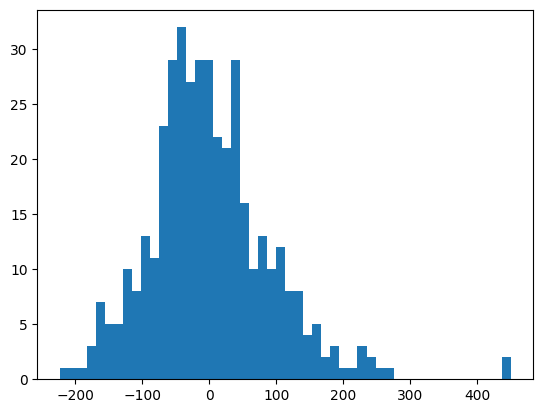

In [213]:
plt.hist(sarima.resid, bins = 50)
plt.show()

In [214]:
#VAMOS FICAR COM O MODELO SARIMAX(2, 1, 0)x(0, 1, [1], 12)	

# 5.2

In [216]:
#fazeruma simulação n=1000 de um SMA(1)(1) (1-0.5B)(1+0.4B^4)e_t , e_t = ruido branco(0,2^2).
# Depois construa um modelo e comente.

In [302]:
phi = np.r_[0.0]
theta = np.r_[-0.5]
Phi = np.r_[0.0]
Theta = [0.4]
sigma2 = 4.0
params = np.r_[phi, theta, Phi,Theta, sigma2]

smasim = sm.tsa.SARIMAX([0], order=(1,0,1), seasonal_order = (1,0,1,4)).simulate(params = params , nsimulations=1000)

<Axes: >

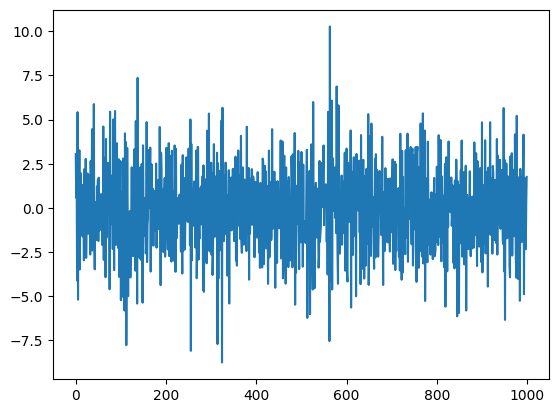

In [303]:
simts = pd.Series(smasim)
simts.plot()

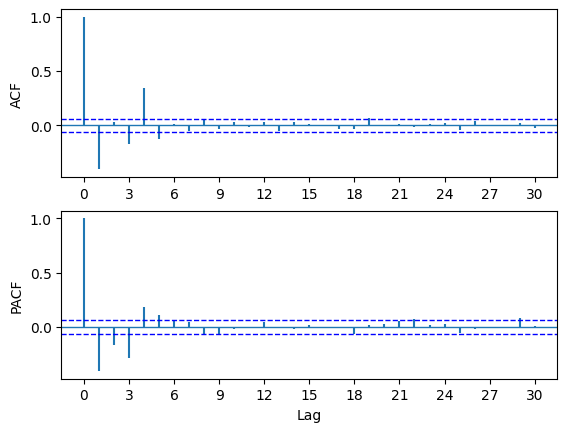

In [304]:
acf_pacf_fig(simts, both =True)

In [305]:
sma_est = sm.tsa.SARIMAX(simts, order = (0,0,1), seasonal_order = (0,0,1,4)).fit()
sma_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1000
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 4)   Log Likelihood               -2132.684
Date:                           Fri, 02 Aug 2024   AIC                           4271.367
Time:                                   19:31:37   BIC                           4286.090
Sample:                                        0   HQIC                          4276.963
                                          - 1000                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5060      0.027    -18.688      0.000      -0.559      -0.453
ma.S.L4        0.3649      0.029     12.722      0.000       0.309       0.421
sigma2         4.1648      0.193     21.586      0.000       3.787       4.543
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               0.95   Skew:                            -0.09
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

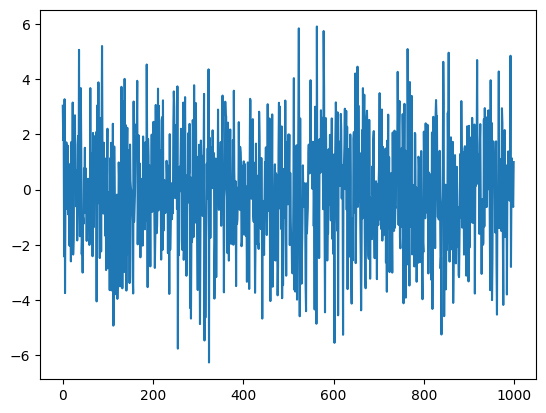

In [306]:
sma_est.resid.plot()

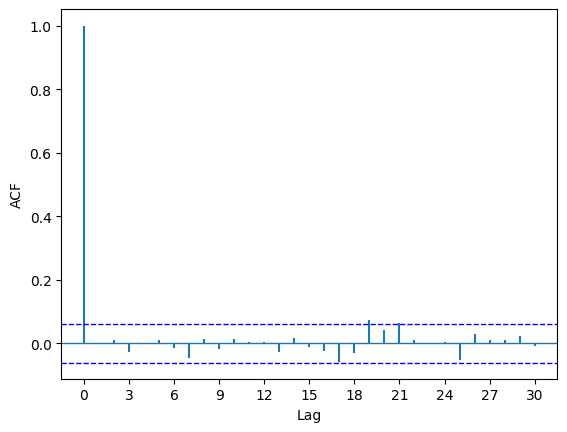

In [307]:
acf_pacf_fig(sma_est.resid)

# 5.3

In [337]:
phi = np.r_[0.0]
theta = np.r_[-0.5]
Phi = np.r_[-0.6]
Theta = [0.0]
sigma2 = 4.0
params = np.r_[phi, theta, Phi,Theta, sigma2]

smasim = sm.tsa.SARIMAX([0], order=(1,0,1), seasonal_order = (1,0,1,6)).simulate(params = params , nsimulations=1000)

<Axes: >

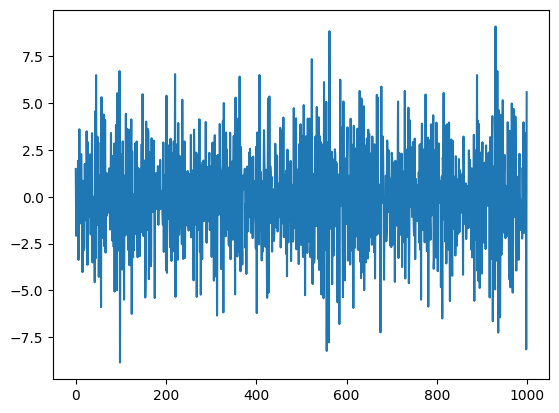

In [338]:
sarmats =pd.Series(smasim)
sarmats.plot()

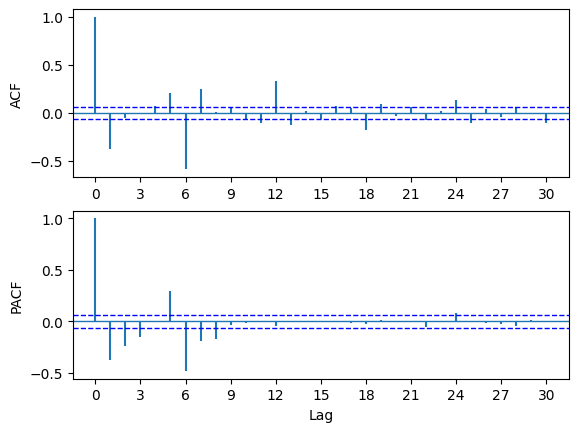

In [339]:
acf_pacf_fig(sarmats, both= True)

In [344]:
model = sm.tsa.SARIMAX(sarmats, order = (0,0,1), seasonal_order = (1,0,0,6)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1000
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 6)   Log Likelihood               -2084.620
Date:                            Fri, 02 Aug 2024   AIC                           4175.240
Time:                                    19:43:49   BIC                           4189.964
Sample:                                         0   HQIC                          4180.836
                                           - 1000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5066      0.028    -17.992      0.000      -0.562      -0.451
ar.S.L6       -0.5937      0.027    -22.332      0.000      -0.646      -0.542
sigma2         3.7751      0.168     22.451      0.000       3.446       4.105
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.91   Prob(JB):                         0.85
Heteroskedasticity (H):               1.13   Skew:                            -0.04
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

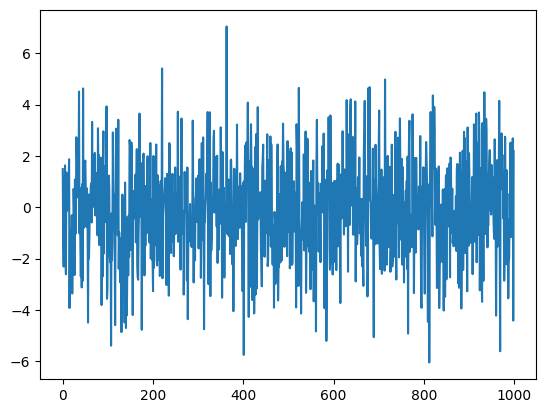

In [346]:
plt.plot(model.resid)

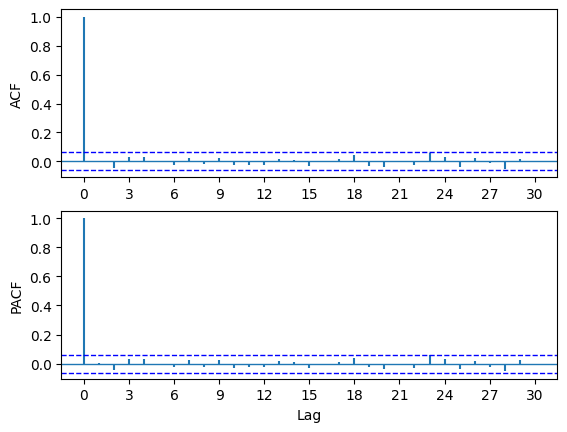

In [349]:
acf_pacf_fig(model.resid, both = True)

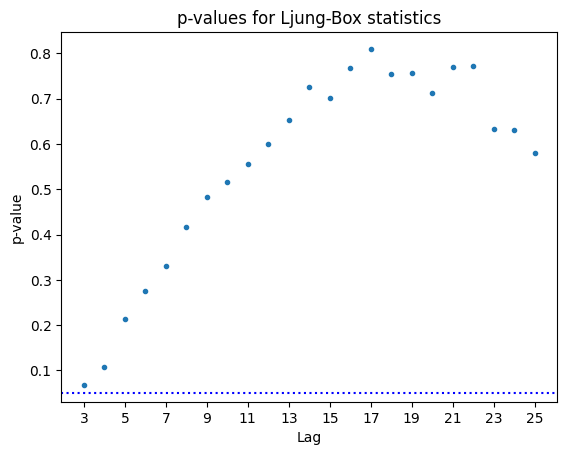

In [355]:
plot_LB_pvalue(model.resid,noestimatedcoef=2 ,nolags=25)

# 5.4

In [369]:
phi = np.r_[-0.6]
theta = np.r_[0.0]
Phi = np.r_[0.0]
Theta = [-0.5]
sigma2 = 4.0
params = np.r_[phi, theta, Phi,Theta, sigma2]

smasim = sm.tsa.SARIMAX([0], order=(1,0,1), seasonal_order = (1,0,1,6)).simulate(params = params , nsimulations=1000)

<Axes: >

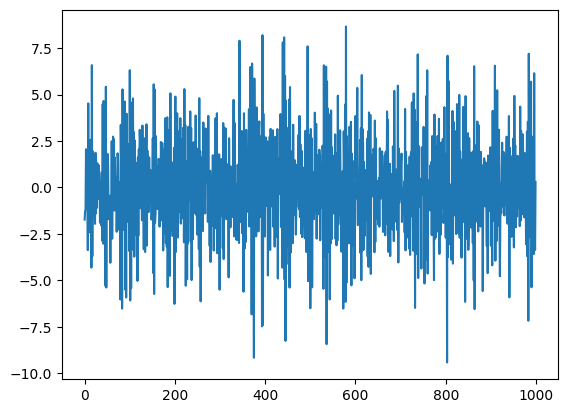

In [370]:
sarmats =pd.Series(smasim)
sarmats.plot()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


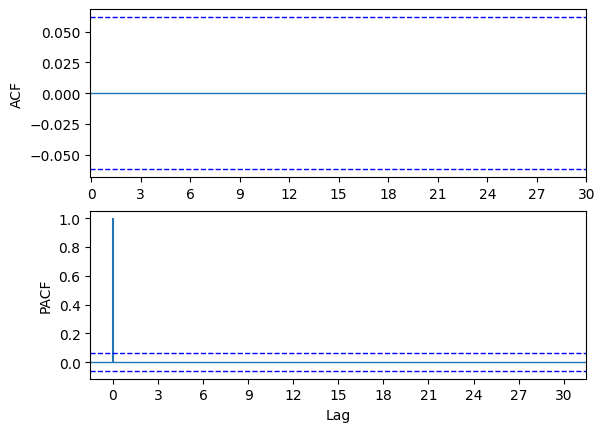

In [367]:
acf_pacf_fig(sarmats, both= True)

In [376]:
model = sm.tsa.SARIMAX(sarmats, order = (1,0,0), seasonal_order = (0,0,1,6)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1000
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 6)   Log Likelihood               -2144.247
Date:                             Sat, 03 Aug 2024   AIC                           4294.493
Time:                                     11:08:04   BIC                           4309.217
Sample:                                          0   HQIC                          4300.089
                                            - 1000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6036      0.025    -24.529      0.000      -0.652      -0.555
ma.S.L6       -0.4831      0.026    -18.322      0.000      -0.535      -0.431
sigma2         4.2572      0.188     22.641      0.000       3.889       4.626
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.75   Prob(JB):                         0.75
Heteroskedasticity (H):               1.22   Skew:                            -0.05
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5.5

In [401]:
phi = np.r_[-0.2]
theta = np.r_[-0.5]
Phi = np.r_[0.3]
Theta = [0.4]
sigma2 = 4.0
params = np.r_[phi, theta, Phi,Theta, sigma2]

smasim = sm.tsa.SARIMAX([0], order=(1,0,1), seasonal_order = (1,0,1,4)).simulate(params = params , nsimulations=1000)

<Axes: >

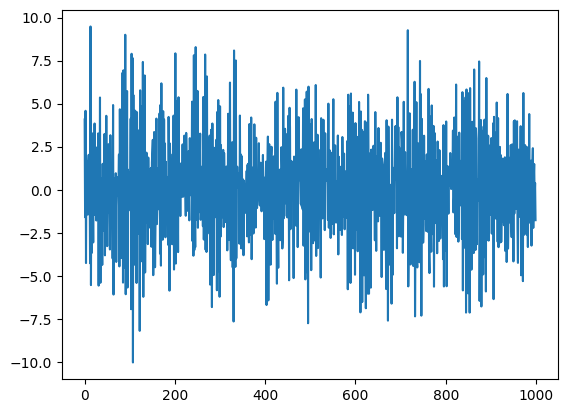

In [402]:
sarmats =pd.Series(smasim)
sarmats.plot()

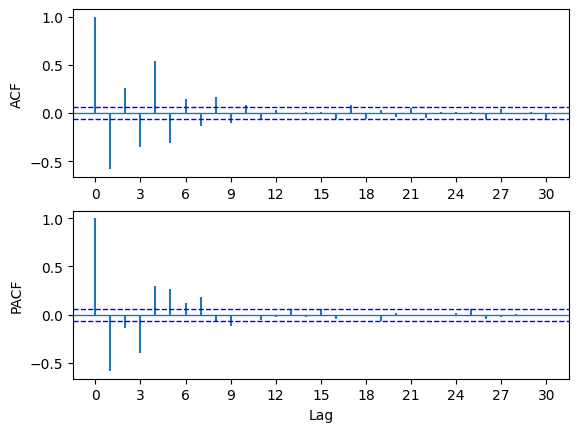

In [403]:
acf_pacf_fig(sarmats, both = True)

In [404]:
model = sm.tsa.SARIMAX(sarmats, order = (1,0,1), seasonal_order = (1,0,1,4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1000
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood               -2131.583
Date:                           Sat, 03 Aug 2024   AIC                           4273.165
Time:                                   11:24:21   BIC                           4297.704
Sample:                                        0   HQIC                          4282.492
                                          - 1000                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2946      0.047     -6.234      0.000      -0.387      -0.202
ma.L1         -0.4405      0.042    -10.531      0.000      -0.522      -0.358
ar.S.L4        0.2656      0.051      5.218      0.000       0.166       0.365
ma.S.L4        0.4157      0.046      8.988      0.000       0.325       0.506
sigma2         4.1491      0.188     22.015      0.000       3.780       4.518
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.93   Prob(JB):                         0.87
Heteroskedasticity (H):               0.99   Skew:                            -0.03
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5.6

In [412]:
z = pd.read_csv(dtapath + 'gdpquarterlychina1992.1-2017.4.csv', header = 0)
dates = pd.date_range(start = '1992', periods = len(z), freq = 'Q')
z.index = dates
z = pd.Series(z['GDP'])
lnx = np.log(z)
dDlnx = sm.tsa.statespace.tools.diff(lnx, k_diff=1, k_seasonal_diff=1, seasonal_periods=4)

<Axes: >

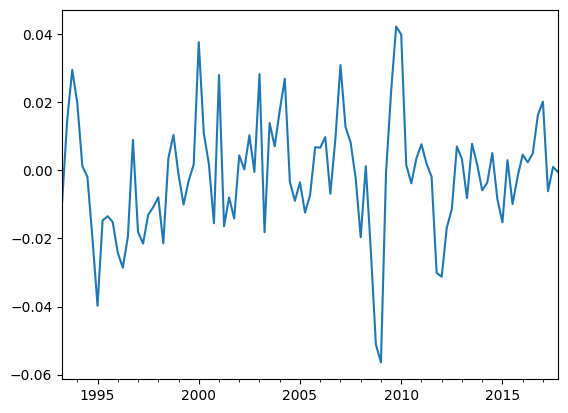

In [413]:
dDlnx.plot()

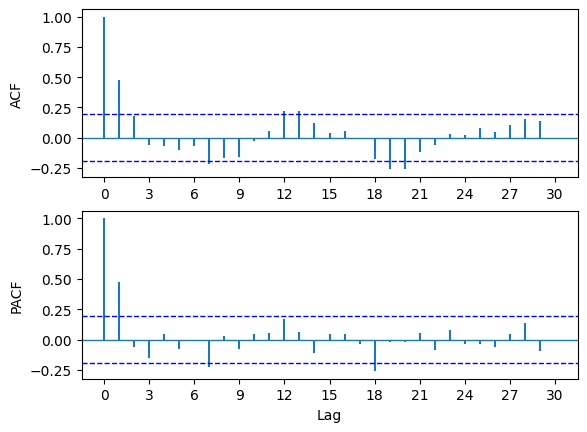

In [414]:
acf_pacf_fig(dDlnx, both= True)

In [418]:
sm.tsa.kpss(dDlnx, regression = 'c', nlags = 'auto')

C:\Users\guilh\AppData\Local\Temp\ipykernel_113960\4178551600.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(dDlnx, regression = 'c', nlags = 'auto')


(0.10298546572401576,
 0.1,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [436]:
#sarima(2,1,0)(0,1,0)4 e depois (1,1,1)(0,1,0)4
sarima210 = sm.tsa.SARIMAX(lnx, order=(2,1,0), seasonal_order = (0,1,0,4)).fit()
sarima210.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               GDP   No. Observations:                  104
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 4)   Log Likelihood                 273.781
Date:                           Sat, 03 Aug 2024   AIC                           -541.561
Time:                                   13:53:32   BIC                           -533.776
Sample:                               03-31-1992   HQIC                          -538.411
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5133      0.075      6.821      0.000       0.366       0.661
ar.L2         -0.0602      0.098     -0.615      0.538      -0.252       0.132
sigma2         0.0002   3.26e-05      7.085      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.85   Prob(JB):                         0.96
Heteroskedasticity (H):               0.50   Skew:                             0.06
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

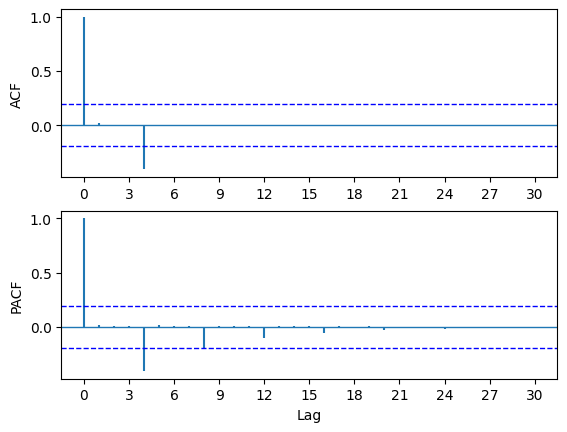

In [430]:
acf_pacf_fig(sarima210.resid, both= True)

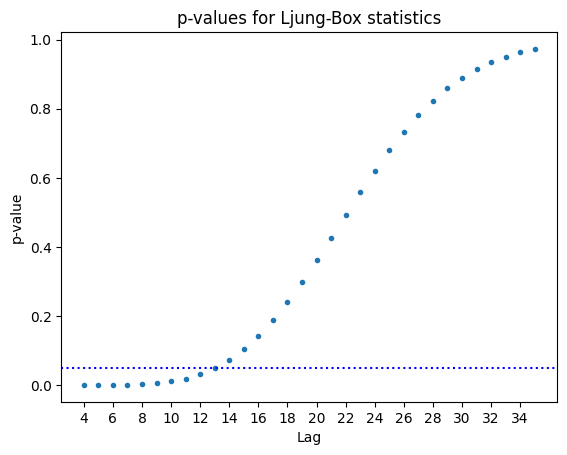

In [431]:
plot_LB_pvalue(sarima210.resid, noestimatedcoef=3 ,nolags = 35)

In [432]:
#SARIMA(1,1,1)(0,1,0)4
sarima111 = sm.tsa.SARIMAX(lnx, order=(1,1,1), seasonal_order = (0,1,0,4)).fit()
sarima111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                GDP   No. Observations:                  104
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                 273.703
Date:                            Sat, 03 Aug 2024   AIC                           -541.405
Time:                                    11:51:44   BIC                           -533.620
Sample:                                03-31-1992   HQIC                          -538.255
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4342      0.189      2.301      0.021       0.064       0.804
ma.L1          0.0515      0.206      0.250      0.803      -0.352       0.455
sigma2         0.0002   3.28e-05      7.066      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.89   Prob(JB):                         0.95
Heteroskedasticity (H):               0.52   Skew:                             0.07
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

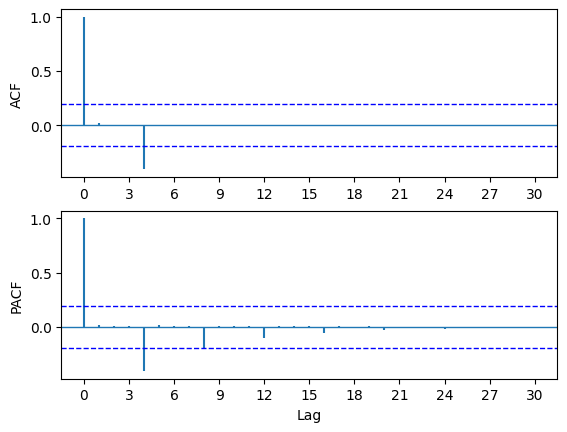

In [433]:
acf_pacf_fig(sarima111.resid, both= True)

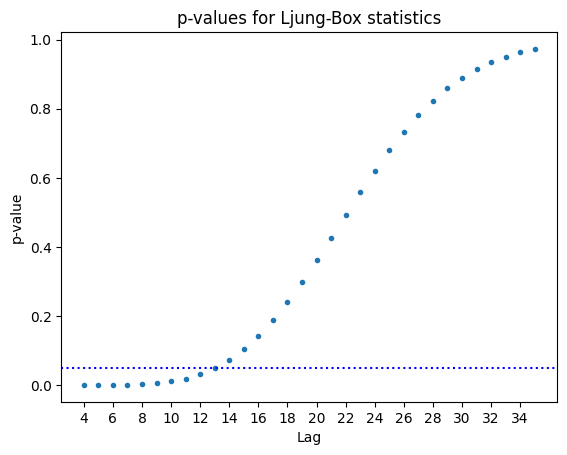

In [434]:
plot_LB_pvalue(sarima111.resid, noestimatedcoef=3 ,nolags = 35)

# Questão 5.7

In [506]:
sarima012 = sm.tsa.SARIMAX(lnx, order=(0,1,2), seasonal_order = (0,1,3,4)).fit()
sarima012.summary()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                         
=================================================================================================
Dep. Variable:                                       GDP   No. Observations:                  104
Model:             SARIMAX(0, 1, 2)x(0, 1, [1, 2, 3], 4)   Log Likelihood                 276.514
Date:                                   Sat, 03 Aug 2024   AIC                           -541.028
Time:                                           14:12:58   BIC                           -525.457
Sample:                                       03-31-1992   HQIC                          -534.728
                                            - 12-31-2017                                         
Covariance Type:                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4884      0.088      5.520      0.000       0.315       0.662
ma.L2          0.2365      0.100      2.370      0.018       0.041       0.432
ma.S.L4       -0.0574      0.084     -0.684      0.494      -0.222       0.107
ma.S.L8        0.0234      0.114      0.206      0.837      -0.199       0.246
ma.S.L12       0.1999      0.099      2.027      0.043       0.007       0.393
sigma2         0.0002   2.99e-05      7.277      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.98   Prob(JB):                         0.67
Heteroskedasticity (H):               0.40   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$\Theta_1$ e $\Theta_2$ não são significantes

In [522]:
sarima012 = sm.tsa.SARIMAX(lnx, order=(0,1,2), seasonal_order = (0,1,[3],4)).fit()
sarima012.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 GDP   No. Observations:                  104
Model:             SARIMAX(0, 1, 2)x(0, 1, [3], 4)   Log Likelihood                 276.367
Date:                             Sat, 03 Aug 2024   AIC                           -544.735
Time:                                     14:15:10   BIC                           -534.354
Sample:                                 03-31-1992   HQIC                          -540.535
                                      - 12-31-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4735      0.082      5.793      0.000       0.313       0.634
ma.L2          0.2345      0.099      2.363      0.018       0.040       0.429
ma.S.L12       0.1955      0.097      2.024      0.043       0.006       0.385
sigma2         0.0002   2.98e-05      7.333      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.91   Prob(JB):                         0.75
Heteroskedasticity (H):               0.42   Skew:                             0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

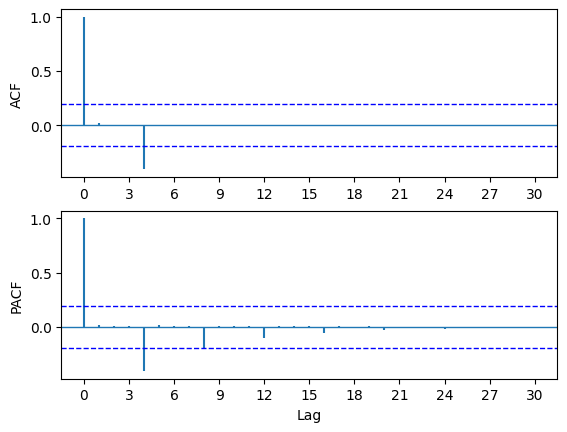

In [517]:
acf_pacf_fig(sarima012.resid, both= True)

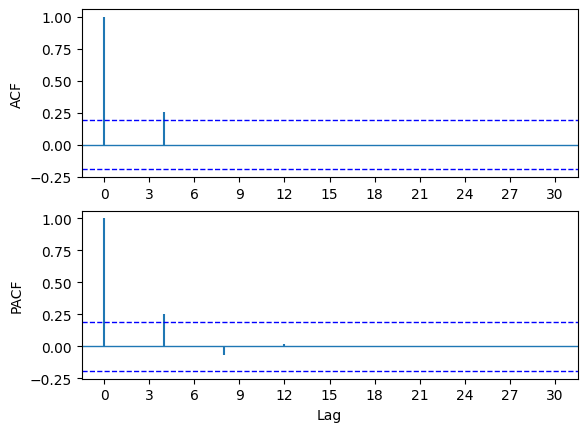

In [518]:
acf_pacf_fig(sarima012.resid**2, both= True)

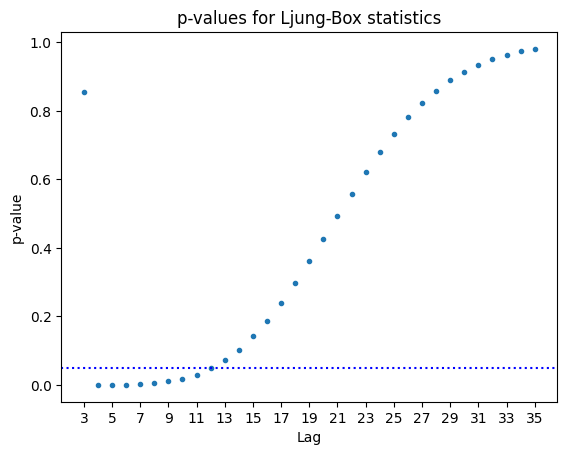

In [519]:
plot_LB_pvalue(sarima012.resid, noestimatedcoef=2 ,nolags = 35)

In [520]:
from PythonTsa.ModResidDiag import plot_ResidDiag

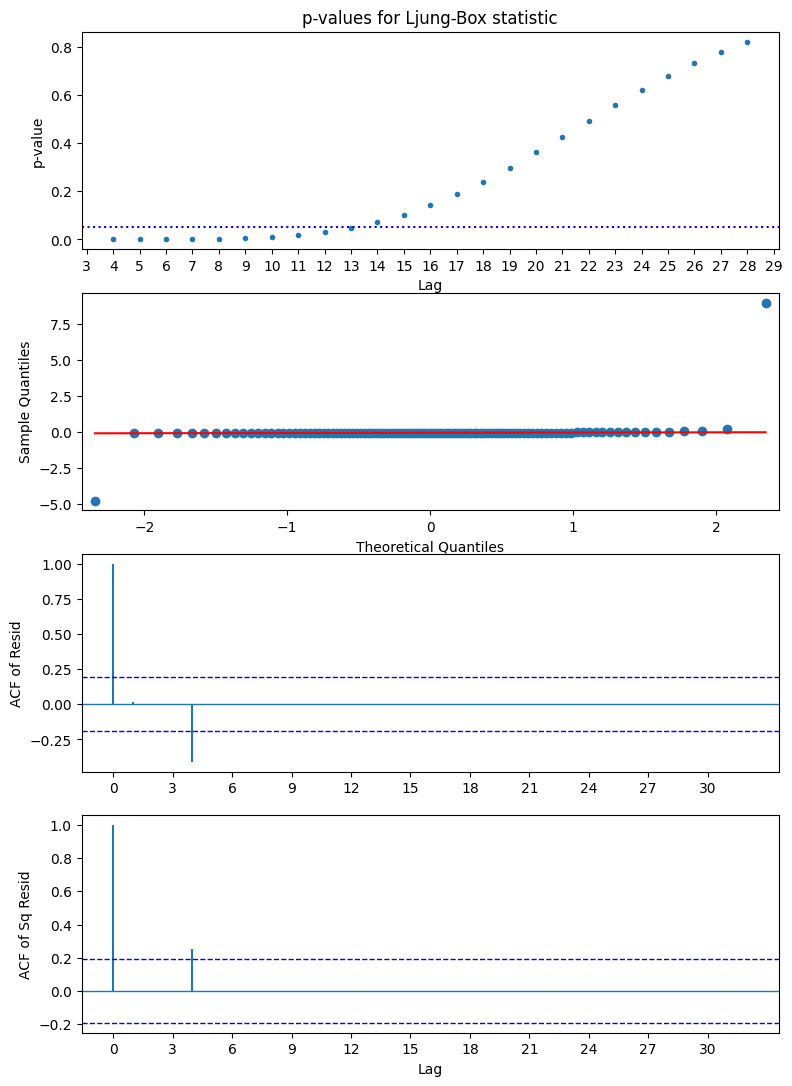

In [521]:
plot_ResidDiag(sarima012.resid, noestimatedcoef = 3, nolags=28, lag=32)

# 5.8

Valide que os modelos SARIMA(3,0,0)(2,1,0)12, (3,0,0)(0,1,1)12 E (0,0,5)(0,1,1)12 no exemplo 5.5 não são apropriados

<Axes: >

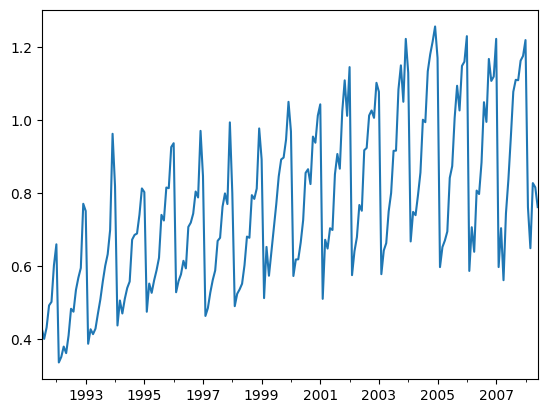

In [525]:
h02 = pd.read_csv(dtapath + 'h02July1991June2008.csv', header = 0)
dates = pd.date_range(start ='1991-07', periods = len(h02), freq = 'M')
h02.index = dates
h02 = pd.Series(h02['h02'])
h02.plot()

<Axes: >

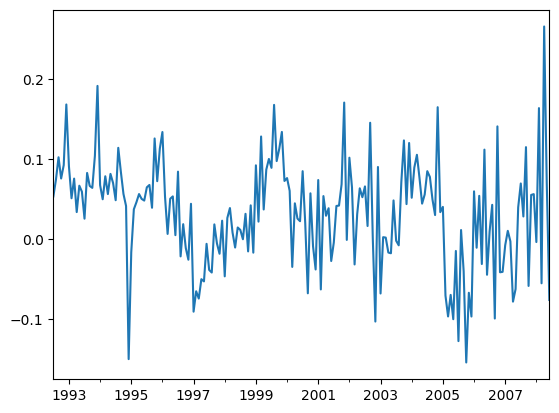

In [571]:
#tirar sazonalidade
Dh02 = sm.tsa.statespace.tools.diff(h02, k_diff=0, k_seasonal_diff=1, seasonal_periods=12)
Dh02.plot()

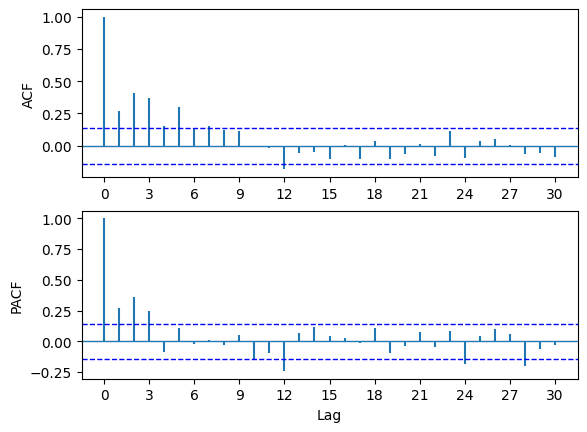

In [529]:
acf_pacf_fig(Dh02, both=True)

In [609]:
#SARIMA(3,0,0)(2,1,0)12, (3,0,0)(0,1,1)12 e (0,0,5)(0,1,1)12 
#abaixo modelo do exemplo, só alterar...
model1 = sm.tsa.SARIMAX(h02, order=(0,0,[1,2,3,5]), seasonal_order = (2,1,0,12)).fit(disp=False)
model1.summary()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:                                            h02   No. Observations:                  204
Model:             SARIMAX(0, 0, [1, 2, 3, 5])x(2, 1, [], 12)   Log Likelihood                 279.791
Date:                                        Sat, 03 Aug 2024   AIC                           -545.582
Time:                                                14:48:04   BIC                           -522.780
Sample:                                            07-31-1991   HQIC                          -536.347
                                                 - 06-30-2008                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2049      0.061      3.348      0.001       0.085       0.325
ma.L2          0.4977      0.064      7.783      0.000       0.372       0.623
ma.L3          0.5101      0.069      7.357      0.000       0.374       0.646
ma.L5          0.3495      0.075      4.684      0.000       0.203       0.496
ar.S.L12      -0.2717      0.068     -3.996      0.000      -0.405      -0.138
ar.S.L24      -0.2588      0.074     -3.476      0.001      -0.405      -0.113
sigma2         0.0031      0.000     10.339      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 4.03
Prob(Q):                              0.51   Prob(JB):                         0.13
Heteroskedasticity (H):               1.54   Skew:                            -0.08
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [607]:
res = model1.resid[12:]

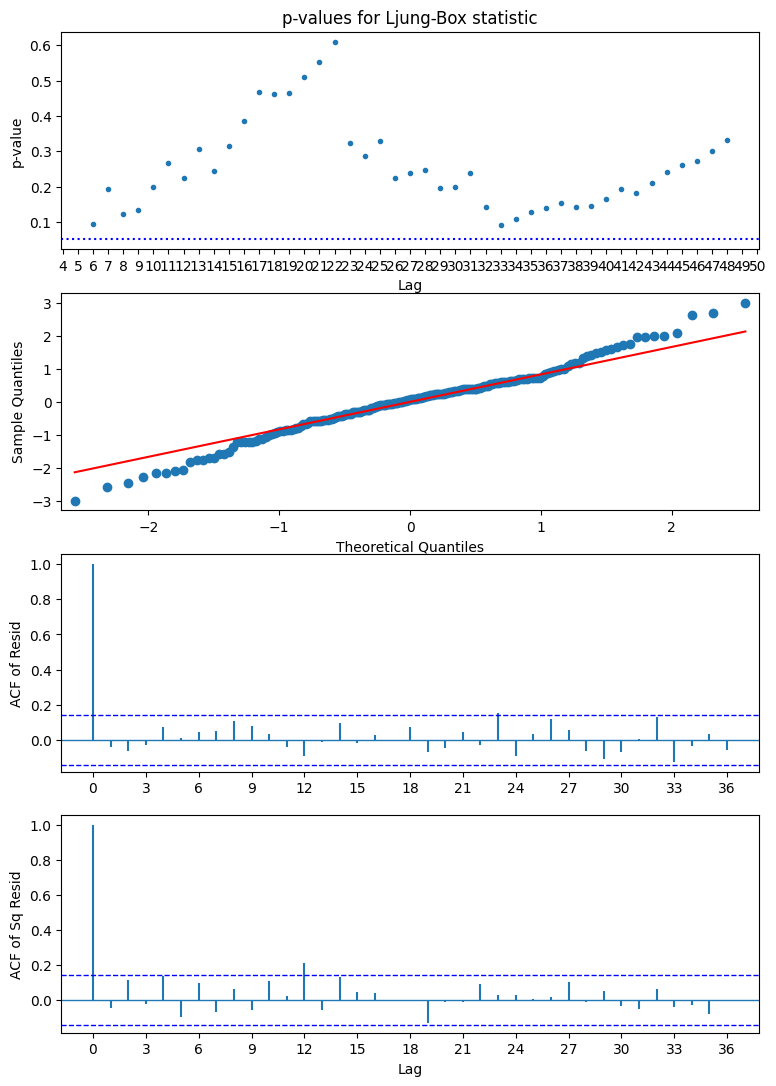

In [608]:
plot_ResidDiag(res, noestimatedcoef=5, nolags=48, lag=36)

#SARIMA(3,0,0)(2,1,0)12 = problemas de autocorrelção no Ljung-box em varios lags, ar1 não sig


#SARIMA(3,0,0)(0,1,1)12 = problemas de autocorrelção no Ljung-box em varios lags, ar1 não sig

#SARIMA(0,0,5)(0,1,1)12 = autocorrelação, MA4 não sig, e mesmo tirando o MA4 ainda tem problema com Ljung-Box

# 5.9
Vamos testar se o modelo continua estacionario se tirarmos o log e montar

<Axes: >

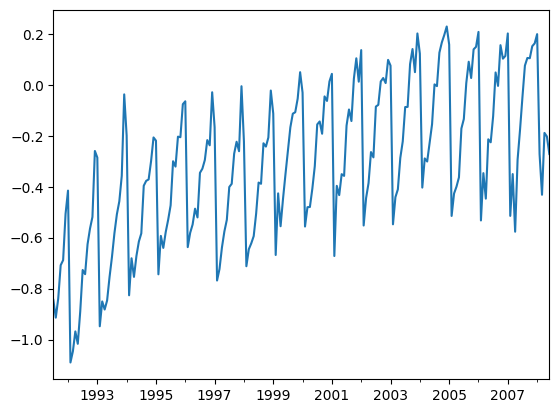

In [610]:
lh02 = np.log(h02)
lh02.plot()

<Axes: >

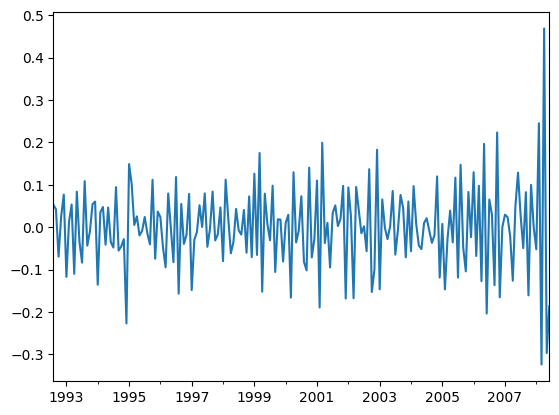

In [767]:
Dlh02 = sm.tsa.statespace.tools.diff(lh02, k_diff=1, k_seasonal_diff=1, seasonal_periods=12)
Dlh02.plot()

In [768]:
sm.tsa.kpss(Dlh02, regression='c', nlags='auto') 

C:\Users\guilh\AppData\Local\Temp\ipykernel_113960\3308667920.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(Dlh02, regression='c', nlags='auto')


(0.016186750469172825,
 0.1,
 2,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

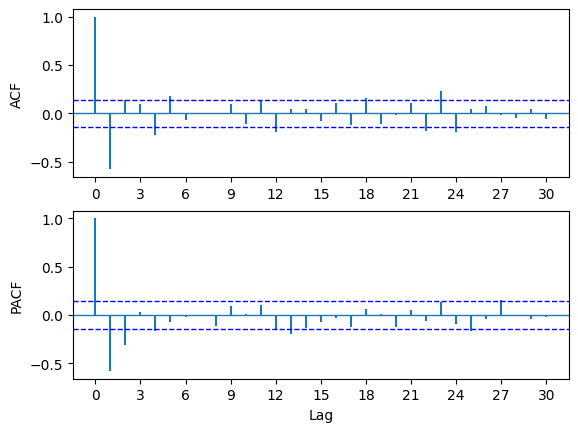

In [769]:
acf_pacf_fig(Dlh02, both=True)

In [790]:
model2 = sm.tsa.SARIMAX(lh02, order=(2,1,[4]), seasonal_order = (2,1,0,12)).fit(disp=False)
model2.summary()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                   h02   No. Observations:                  204
Model:             SARIMAX(2, 1, [4])x(2, 1, [], 12)   Log Likelihood                 246.149
Date:                               Sat, 03 Aug 2024   AIC                           -480.299
Time:                                       15:25:59   BIC                           -460.785
Sample:                                   07-31-1991   HQIC                          -472.395
                                        - 06-30-2008                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8371      0.064    -13.103      0.000      -0.962      -0.712
ar.L2         -0.3841      0.067     -5.747      0.000      -0.515      -0.253
ma.L4         -0.2589      0.082     -3.156      0.002      -0.420      -0.098
ar.S.L12      -0.4457      0.068     -6.577      0.000      -0.578      -0.313
ar.S.L24      -0.3437      0.084     -4.091      0.000      -0.508      -0.179
sigma2         0.0043      0.000     11.674      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.75
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                             0.20
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

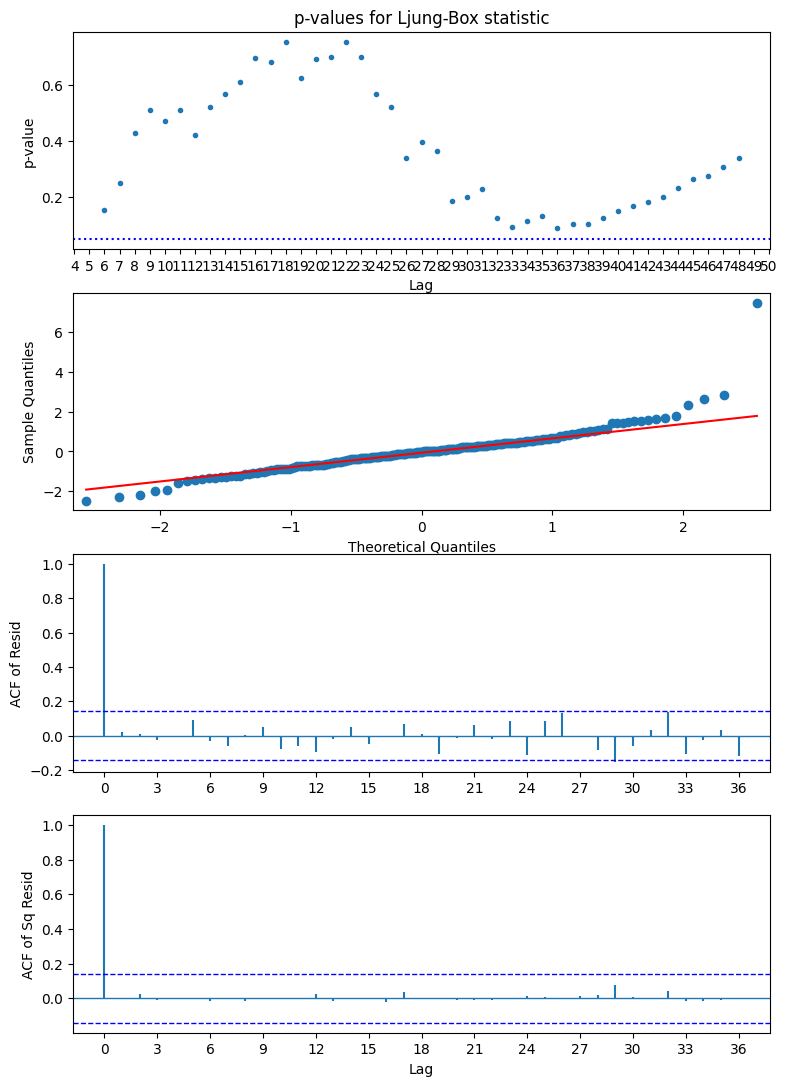

In [792]:
plot_ResidDiag(model2.resid[12:], noestimatedcoef=5, nolags=48, lag=36)

# 5.10
exemplo 3.1 com os metodos da seção 5

In [795]:
temp = pd.read_csv(dtapath + 'Southtemperature.txt', header = None, sep='\s+')
temp

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.625,-0.598,-0.841,-0.632,-0.326,-0.528,-0.296,-0.503,-0.602,-0.420,-0.234,-0.358
1,-0.461,-0.326,-0.368,-0.555,-0.494,-0.417,-0.309,-0.228,-0.419,-0.282,-0.155,-0.253
2,-0.854,-0.689,-0.619,-0.638,-0.412,-0.354,0.007,-0.468,-0.339,-0.411,-0.247,-0.241
3,-0.600,-0.706,-0.420,-0.475,-0.494,-0.456,-0.204,-0.266,-0.519,-0.493,-0.254,-0.503
4,-0.488,-0.458,-0.594,-0.530,-0.582,-0.379,-0.605,-0.597,-0.220,-0.463,-0.454,-0.666
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.438,0.467,0.436,0.401,0.351,0.434,0.371,0.346,0.348,0.355,0.362,0.309
154,0.359,0.392,0.340,0.388,0.232,0.260,0.239,0.284,0.295,0.354,0.275,0.282
155,0.330,0.381,0.418,0.405,0.347,0.356,0.351,0.368,0.259,0.328,0.260,0.255
156,0.326,0.368,0.323,0.299,0.232,0.267,0.324,0.330,0.214,0.241,0.228,0.303


In [799]:
temts = pd.concat([temp.loc[0], temp.loc[1]] ,ignore_index='true')

In [801]:
for i in range(2,158):
    temts=pd.concat([temts,temp.loc[i]],ignore_index = 'true')
type(temts)

pandas.core.series.Series

In [1041]:
dates=pd.date_range('1850', periods = len(temts), freq ='M')
temts.index=dates

In [1081]:
ytemts = temts.resample(rule= '12M', kind='period').mean()
ydates=pd.date_range('1850', periods = len(ytemts), freq ='A')
ytemts.index=ydates

<Axes: >

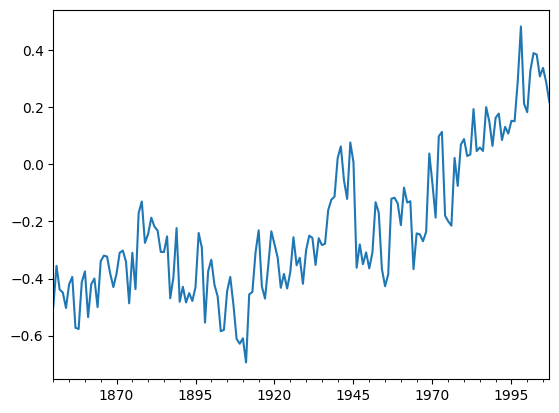

In [1082]:
ytemts.plot()

In [963]:
import math

In [1104]:
temp = temts['1970-01':'2007-12']

In [1105]:
cos = np.zeros((len(temp), 6))
sin = np.zeros((len(temp), 6))
tim = np.zeros(len(temp))

In [1106]:
sin.shape

(456, 6)

In [1136]:
for i in range(36):
    for j  in range(12):
        tim[i*12+j] = 1850.0+i+j/12.0
pi = math.pi
for i in range(6):
    cos[:,i] = np.cos(2 * pi* (i+1) *tim)
    sin[:,i] = np.sin(2 * pi* (i+1) *tim)
    
TIME = (tim - np.mean(tim))/ np.sqrt(np.var(tim))
np.mean(tim)

1769.6447368421052

In [1137]:
np.sqrt(np.var(tim))

417.2318945525956

<Axes: >

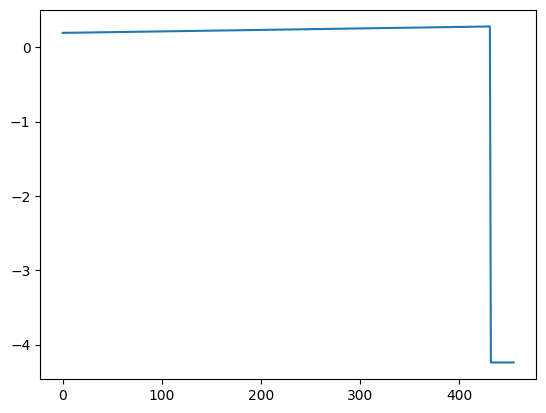

In [1138]:
pd.Series(TIME).plot()

In [1240]:
z1 = np.column_stack((TIME, cos[:,0], sin[:,0], cos[:,1], sin[:,1],cos[:,2], sin[:,2],cos[:,3], sin[:,3],
                      cos[:,4],sin[:,4], cos[:,5], sin[:,5]))
z1 = sm.add_constant(z1)
olsmod = sm.OLS(temp, z1).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9225
Date:                Sat, 03 Aug 2024   Prob (F-statistic):              0.529
Time:                        18:37:11   Log-Likelihood:                 130.98
No. Observations:                 456   AIC:                            -234.0
Df Residuals:                     442   BIC:                            -176.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1232      0.009     14.024      0.000       0.106       0.140
x1            -0.0262      0.011     -2.392      0.017      -0.048      -0.005
x2            -0.0030      0.013     -0.242      0.809      -0.028       0.022
x3             0.0116      0.013      0.928      0.354      -0.013       0.036
x4             0.0023      0.013      0.187      0.852      -0.022       0.027
x5             0.0082      0.014      0.569      0.569      -0.020       0.037
x6            -0.0038      0.013     -0.300      0.765      -0.028       0.021
x7            -0.0013      0.013     -0.100      0.921      -0.026       0.023
x8             0.0004      0.013      0.029      0.977      -0.024       0.025
x9            -0.0002      0.013     -0.019      0.985      -0.025       0.024
x10            0.0050      0.013      0.397      0.692      -0.020       0.030
x11            0.0005      0.013      0.042      0.966      -0.024       0.025
x12            0.0046      0.011      0.435      0.663      -0.016       0.026
x13         3.568e+07   2.14e+09      0.017      0.987   -4.16e+09    4.23e+09
==============================================================================
Omnibus:                        3.501   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.467
Skew:                          -0.135   Prob(JB):                        0.177
Kurtosis:                       3.331   Cond. No.                     3.05e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: >

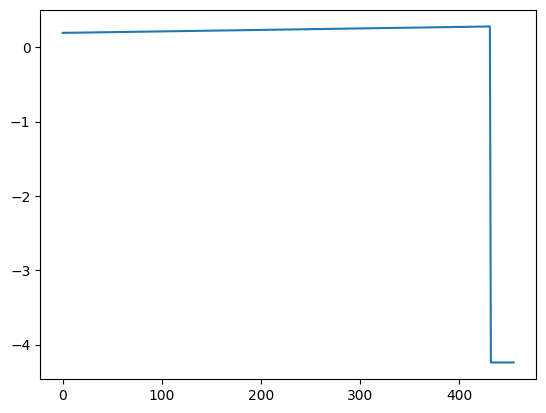

In [1165]:
pd.Series(TIME).plot()

In [1245]:
x1 = np.column_stack((TIME,TIME**2))
x1 = sm.add_constant(x1)
olsmodel1 = sm.OLS(temp, x1).fit()
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     274.4
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           8.34e-79
Time:                        18:37:58   Log-Likelihood:                 305.85
No. Observations:                 456   AIC:                            -605.7
Df Residuals:                     453   BIC:                            -593.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1060      0.054    -20.523      0.000      -1.212      -1.000
x1             4.8944      0.215     22.813      0.000       4.473       5.316
x2             1.2295      0.054     22.949      0.000       1.124       1.335
==============================================================================
Omnibus:                       30.928   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.903
Skew:                           0.433   Prob(JB):                     7.26e-13
Kurtosis:                       4.480   Cond. No.                         166.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

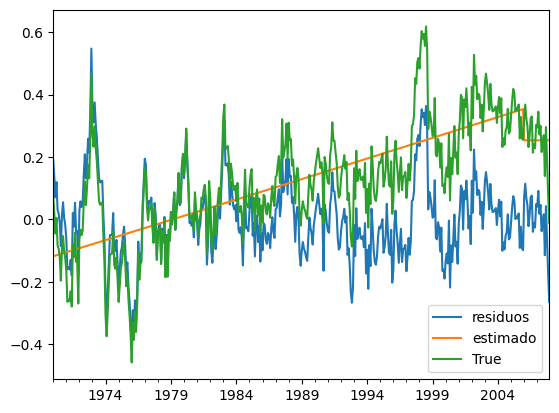

In [1246]:
olsmodel1.resid.plot(label = 'residuos')
olsmodel1.fittedvalues.plot(label = 'estimado')
temp.plot(label = 'True')
plt.legend()

In [1247]:
sm.tsa.kpss(olsmodel1.resid)
#vemos que é estacionario

C:\Users\guilh\AppData\Local\Temp\ipykernel_113960\2615338373.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(olsmodel1.resid)


(0.042795901267776264,
 0.1,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

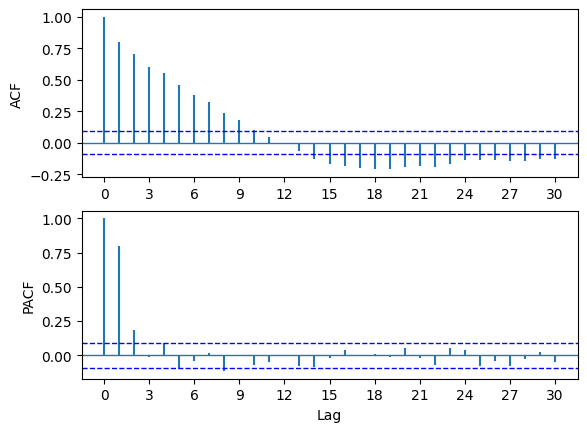

In [1248]:
acf_pacf_fig(olsmodel1.resid, both= True)

In [1264]:
model3 = sm.tsa.SARIMAX(temp, order=(2,0,0),seasonal_order = (1,0,0,4), exog = x1).fit(disp = False)#, seasonal_order = (2,1,1,12)).fit(disp=False)
model3.summary()

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  456
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 4)   Log Likelihood                 556.215
Date:                           Sat, 03 Aug 2024   AIC                          -1098.431
Time:                                   18:41:51   BIC                          -1069.573
Sample:                               01-31-1970   HQIC                         -1087.063
                                    - 12-31-2007                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9974      0.192     -5.187      0.000      -1.374      -0.620
x1             4.4497      0.771      5.770      0.000       2.938       5.961
x2             1.1229      0.194      5.795      0.000       0.743       1.503
ar.L1          0.6709      0.043     15.543      0.000       0.586       0.756
ar.L2          0.1669      0.047      3.556      0.000       0.075       0.259
ar.S.L4        0.1270      0.058      2.191      0.028       0.013       0.241
sigma2         0.0051      0.000     16.132      0.000       0.004       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.87   Prob(JB):                         0.30
Heteroskedasticity (H):               0.85   Skew:                             0.03
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

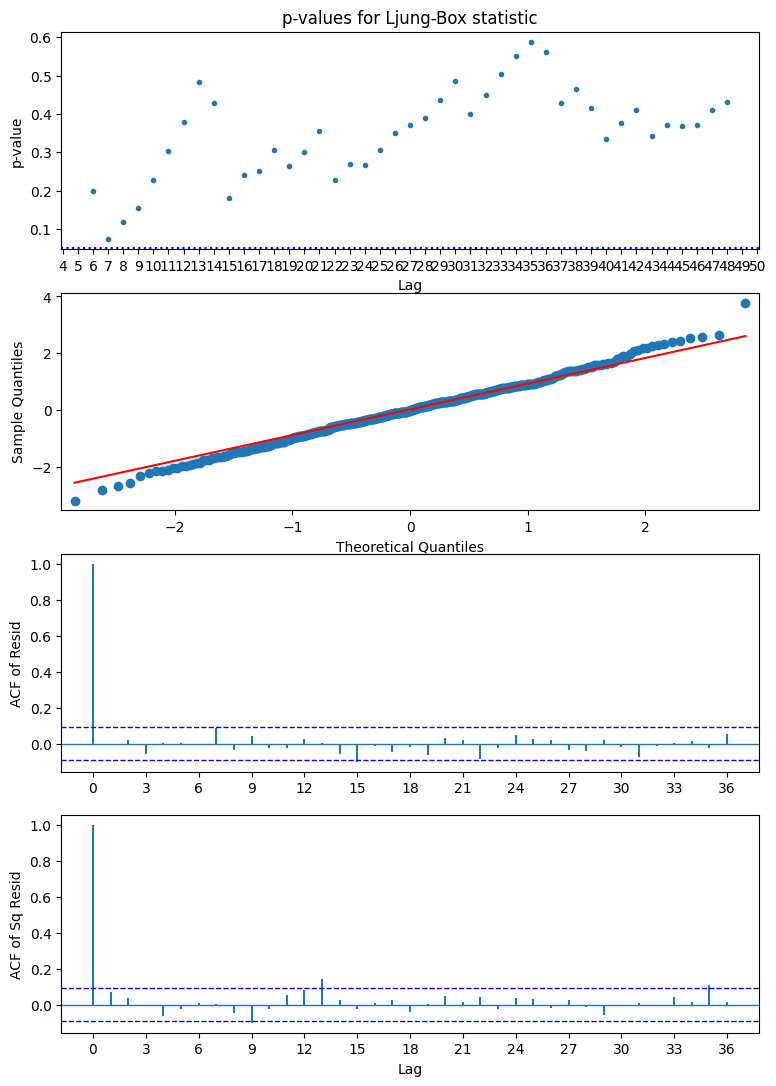

In [1265]:
plot_ResidDiag(model3.resid, noestimatedcoef=5, nolags=48, lag=36)

<Axes: >

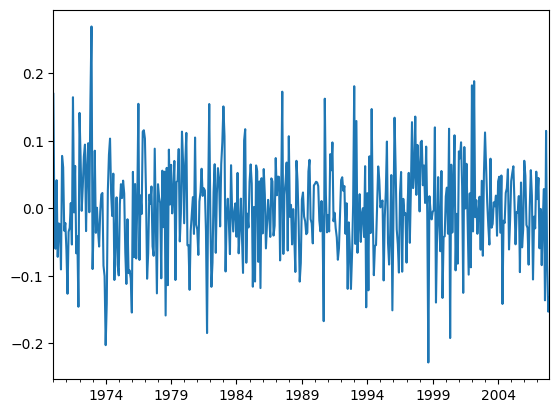

In [1266]:
model3.resid.plot()

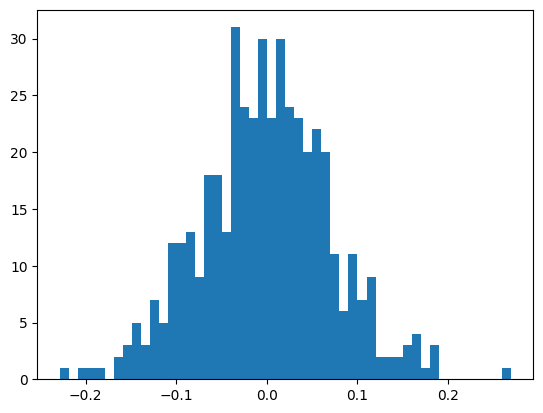

In [1269]:
plt.hist(model3.resid, bins = 50)
plt.show()